In [1]:
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
# NOTE: This GPU is missing from the package. 
# from keras_retinanet.utils.gpu import setup_gpu
from tensorflow.keras.utils import plot_model

from tensorflow.keras.optimizers import Adam

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

C:\Users\cklop\Anaconda3\envs\dl_dg_final\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\cklop\Anaconda3\envs\dl_dg_final\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\cklop\Anaconda3\envs\dl_dg_final\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\cklop\Anaconda3\envs\dl_dg_final\lib\site-pack

In [2]:
model_path = os.path.join("..", "pretrained", "resnet50_coco_best_v2.1.0.h5")
model = models.load_model(model_path, backbone_name = 'resnet50')

# model = models.convert_model(model)
# model.compile(optimizer = Adam(lr = 0.01))

Using TensorFlow backend.


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_1:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_2:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_3:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_4:0' shape=(9, 4) dtype=float32> anchors


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\cklop\Anaconda3\envs\dl_dg_final\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:
labels_to_names = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}

Processing time 1584301724.6778123 -1584301722.6310506
[31, 0, 255]
[31, 0, 255]
[31, 0, 255]
[255, 153, 0]


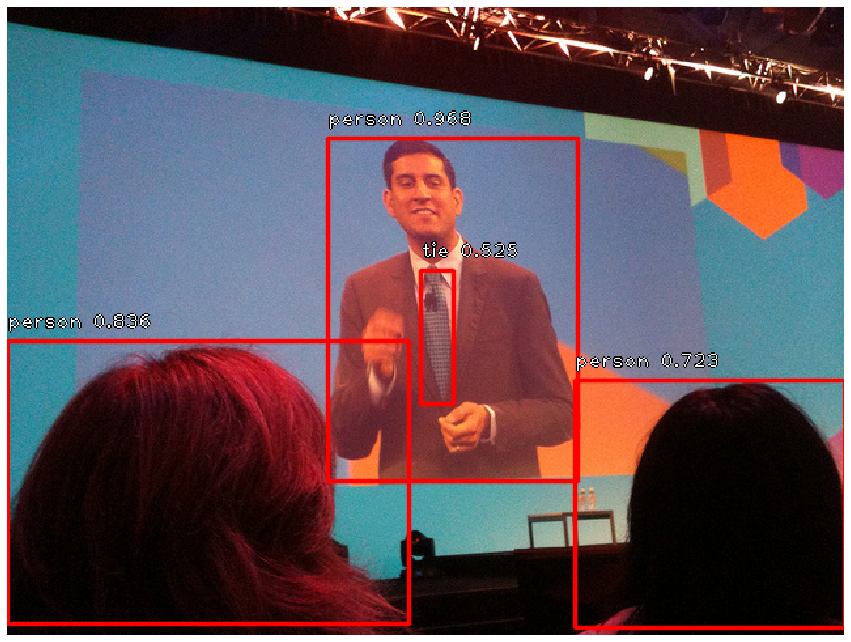

In [7]:
image = read_image_bgr('000000008021.jpg')

draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

image = preprocess_image(image)
image, scale = resize_image(image)
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis = 0))
print('Processing time', time.time(), - start)

boxes /= scale

for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score < 0.5:
        break
        
    color = label_color(label)
    b = box.astype(int)
    draw_box(draw, b, color = color)

    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
        
plt.figure(figsize = (15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

In [5]:
plot_model(model, show_shapes = True)